In [1]:
#Libraries
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import astropy
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import glob
import imageio
import time
import os
from PIL import Image, ImageChops

In [2]:
import cv2
import numpy as np
import PIL
from scipy import ndimage

## Filtering + Thresholding

In [7]:
PATH_TO_IMAGE_DIRECTORY = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\CroppedWATsImages")

def GaussianFilter(highpix, i):
    '''
    Input:
        highpix - standard deviation for Gaussian kernel. Default value set to 5 in later lines
        i - image
    Output:
        img -  Gaussian filtered image    
    '''
    original = cv2.imread(r"{}/{}".format(PATH_TO_IMAGE_DIRECTORY, i))
    grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    img = np.copy(grayscale)
    lowpass = ndimage.gaussian_filter(img, highpix)
    img = img.astype(float) - lowpass
    #add artificial background
    bkg = 20
    img = img+bkg
    #remove negative values
    img[img<=0]=0
    #correct for too bright pixels
    img[img>255]=255     
    return (img)

In [8]:
#Saving fits as image
image_names = []
path = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\CroppedWATsImages")
for i in listdir(path):
    #print(i)
    image_names.append(str(i))

In [9]:
filteredImage = GaussianFilter(5, image_names[0])[0]
type(filteredImage)

numpy.ndarray

In [27]:
img = PIL.Image.fromarray(GaussianFilter(5, image_names[0]))
img.show()

if img.mode != 'RGB':
    img = img.convert('RGB')

img.save("gaussianFiltered.jpg")

## Augmentation
- Skewing
- Magnification
- Rotation

Sources: https://stackoverflow.com/questions/24191545/skewing-or-shearing-an-image-in-python

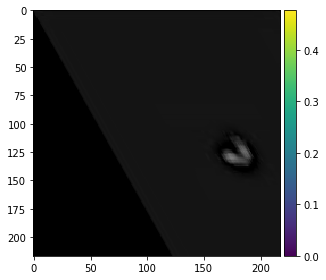

In [26]:
from skimage import io
from skimage import transform as tf

# Load the image as a matrix
image = io.imread(r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\gaussianFiltered.jpg")

# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.6)
# Apply transform to image data
modified = tf.warp(img, inverse_map=afine_tf)

# Display the result
io.imshow(modified)
io.show()

Augmenting with keras

In [30]:
# augmenting with keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


img_height = 180
img_width = 180


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [31]:
for i in range(9):
        augmented_image = data_augmentation(img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

TypeError: Inputs to a layer should be tensors. Got: <PIL.Image.Image image mode=RGB size=218x217 at 0x1EA83E81DC8>

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
      for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")